# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


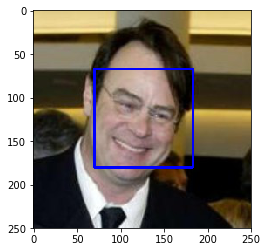

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
h_detected_human = 0
d_detected_human = 0
for h in human_files_short:
    if face_detector(h):
        h_detected_human+=1
for d in dog_files_short:
    if face_detector(d):
        d_detected_human+=1
print("{}% of human faces are detected as human".format(h_detected_human))
print("{}% of dog faces are detected as human".format(d_detected_human))

98% of human faces are detected as human
17% of dog faces are detected as human


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
print(use_cuda)

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:31<00:00, 17331088.86it/s]


True


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def model_predict(img_path, model):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    normalize = transforms.Normalize(
       mean=[0.485, 0.456, 0.406],
       std=[0.229, 0.224, 0.225]
    )
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ])
    
    image = Image.open(img_path)
    image_tensor = preprocess(image).float()
    image_tensor.unsqueeze_(0) #unsqueeze to add index for batch

    image_variable = Variable(image_tensor)
    if use_cuda:
        image_variable = image_variable.cuda()
    
    output = model(image_variable)
    _, pred = torch.max(output, 1)
    return pred[0]

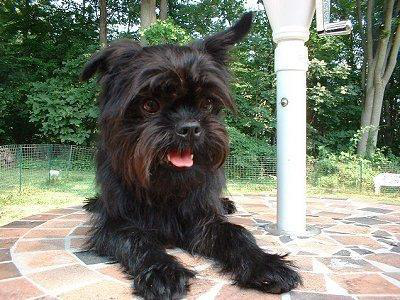

In [8]:
image_path = '/data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg'
x = model_predict(image_path, VGG16)
image = Image.open(image_path)
image

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    x = (151<=model_predict(img_path, VGG16)<=268)
    return x # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
h_detected_as_d = 0
d_detected_as_d = 0
for h,d in zip(human_files_short, dog_files_short):
    if(dog_detector(h)):
        h_detected_as_d +=1
    if(dog_detector(d)):
        d_detected_as_d +=1

In [12]:
print("{}% of humans have been detected as dog".format(h_detected_as_d))
print("{}% of dogs have been detected as dog".format(d_detected_as_d))

1% of humans have been detected as dog
100% of dogs have been detected as dog


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [10]:
import os
import torch
from torchvision import datasets, transforms

data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

transform_train = transforms.Compose([transforms.RandomRotation(30),
                                    transforms.RandomResizedCrop(224),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor()])


transform_valid_test = transforms.Compose([transforms.Resize(255),
                                          transforms.CenterCrop(224),
                                          transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=transform_train)
valid_data = datasets.ImageFolder(valid_dir, transform=transform_valid_test)
test_data = datasets.ImageFolder(test_dir, transform=transform_valid_test)

trainloader = torch.utils.data.DataLoader(train_data, batch_size = 32, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size = 32)
testloader = torch.utils.data.DataLoader(test_data, batch_size = 32)

loaders_scratch = {'train':trainloader, 'valid':validloader, 'test':testloader}


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- The preprocessing procedure for training takes a colored picture (if the input is ImageNet a 256x256 image), randomly rotates it by a random angle selected from [-30,+30], next, the image is resized by a random aspect ratio (selected from the range (0.75, 1.33)) and random scale and it will be cropped to 224x224. The reason for this cropping, is that VGG16 takes only 224x224 images as input. The image is then flipped horizontaly (randomly) and finally the PIL image is converted to tensor which is well suited for pytorch.

- I have decided for augmentation because it enlarges my dataset, which is plausible in deeplearning. In addition to that, it helps my model to generalize. The testing images may be the mirror image of the training set. It could be rotated a bit or in different sizes. All these possibilities can be artificially simulated using data augmentation. The detailed procedure is described in the previous answer

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [40]:
use_cuda = torch.cuda.is_available()

import torch.nn as nn
import torch.nn.functional as F
breed_num = 133
image_size = 224

conv1_in = 3
conv1_out = 16
conv2_in = conv1_out
conv2_out = 32
conv3_in = conv2_out
conv3_out = 64
conv4_in = conv3_out
conv4_out = 128
pool_rat = 2
pooling_num = 4
last_conv_out = conv4_out
fc1_in = int((image_size/(pool_rat**pooling_num))**2*last_conv_out)
fc1_out = 500
fc2_in = fc1_out
fc2_out = breed_num
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(conv1_in,conv1_out,3,padding=1)
        self.conv2 = nn.Conv2d(conv2_in,conv2_out,3,padding=1)
        self.conv3 = nn.Conv2d(conv3_in,conv3_out,3,padding=1)
        self.conv4 = nn.Conv2d(conv4_in,conv4_out,3,padding=1)
        
        self.conv_bn1 = nn.BatchNorm2d(16)
        self.conv_bn2 = nn.BatchNorm2d(32)
        self.conv_bn3 = nn.BatchNorm2d(64)
        self.conv_bn4 = nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d(2,2)
        
        self.dropout = nn.Dropout(0.25)
        
        self.fc1 = nn.Linear(fc1_in, fc1_out)
        self.fc2 = nn.Linear(fc2_in, fc2_out)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.conv_bn1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.conv_bn2(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.conv_bn3(x)        
        x = self.pool(F.relu(self.conv4(x)))
        x = self.conv_bn4(x)


        
        x = x.view(-1,fc1_in)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        #x = F.relu(self.fc2(x))
        x = self.fc2(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [41]:
use_cuda

True

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
I have decided for 4 convolutional layers, with growing number of filters, from 3 (for the colored input image) to 128. Each layer has to detect a much more specific pattern compared to its previous layer. Hence it needs more parameters to fit. These parameters are reflected in the number of filters. After each convolutional layer, a relu is used to provide the firing logic behind neural networks. The batch normalization layers have been used in order to decouple the distribution of each layer from the values of the layers, allowing larger learning rate. After many trials, I have seen the great impact of batch normalization layers in reducing the loss. 
The maxpooling layers have been chosen in order to save the resources by reducing the image size in each step. Finally, I connected the output of these convolutional layers to two fully connected layers in order to classify the input pictures.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [42]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [43]:
# the following import is required for training to be robust to truncated images
import numpy as np
from PIL import ImageFile
import PIL
from tqdm import tqdm_notebook as tqdm
print(PIL.__version__)
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            output = model(data)
            if batch_idx%100==0:
                print("Epoch: {}, step: {} out of {}, training loss = {} ".format(epoch, batch_idx, len(loaders['train']), train_loss))
            loss = criterion(output,target)
            loss.backward()
            optimizer.step()
                
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model


# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

5.2.0
Epoch: 1, step: 0 out of 209, training loss = 0.0 
Epoch: 1, step: 100 out of 209, training loss = 4.862203598022461 
Epoch: 1, step: 200 out of 209, training loss = 4.820767879486084 
Epoch: 1 	Training Loss: 4.814218 	Validation Loss: 4.658038
Validation loss decreased (inf --> 4.658038).  Saving model ...
Epoch: 2, step: 0 out of 209, training loss = 0.0 
Epoch: 2, step: 100 out of 209, training loss = 4.643556594848633 
Epoch: 2, step: 200 out of 209, training loss = 4.617976665496826 
Epoch: 2 	Training Loss: 4.610732 	Validation Loss: 4.448752
Validation loss decreased (4.658038 --> 4.448752).  Saving model ...
Epoch: 3, step: 0 out of 209, training loss = 0.0 
Epoch: 3, step: 100 out of 209, training loss = 4.487546920776367 
Epoch: 3, step: 200 out of 209, training loss = 4.468823432922363 
Epoch: 3 	Training Loss: 4.467022 	Validation Loss: 4.659846
Epoch: 4, step: 0 out of 209, training loss = 0.0 
Epoch: 4, step: 100 out of 209, training loss = 4.360384464263916 
Epoch

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [44]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.476203


Test Accuracy: 18% (157/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [ ]:
## TODO: Specify data loaders


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [11]:
import torch
import torchvision.models as models
import torch.nn as nn
use_cuda = torch.cuda.is_available()

model_transfer = models.vgg16(pretrained=True)
if use_cuda:
    model_transfer = model_transfer.cuda()
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

- VGG16 is well suited for image classification with high accuracy (92.7% accuracy on the ImgageNet). The architecture consists of two parts: 1)Feature detection consisting of deep convolutional neural networks which detects features in a given picture. This detection is independent from the project we are interested in. 2) Classifier, consisting of fully connected layers in order to asign the the features to one of the 1000 classes in the ImageNet. This part depends on the task we want to accomplish. I can imagine that both parts should have done their tasks quite nicely, otherwise such a great accuracy shouldn't have arised! For our classification task, we borrow the feature detection part from VGG16. The last layer of the classifier, however is not relevant for our dog breed detection project. In fact, we want to classify the detected feature to one of the 133 dog breeds rather than 1000 picture classes of ImageNet. Assuming that all classifier layers are designed carefully, the minimal change to adapt VGG16 to our project would be to just modify the final fc layer of the classifier and train it for the dog breeds. Steps are as follows:
1) read the input number of the last layer of the classifier (in_features)
2) specify the output of the new classifier. This is equal 133, because we have 133 dog breeds (out_features).
3) Substitute the linear layer of in_features x 1000 with our linear layer of in_feature x out_feature
4) Train the whole classifier layers with the dog dataset while keeping all other layers unchanged. To do so, we set the "requires_grad" attributes of all parameters in the features to False. Consequently only classifier parameters are modified during the backpropagation steps. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [13]:
for param in model_transfer.features.parameters():
    param.requires_grad = False
    
breed_no = 133
in_features = model_transfer.classifier[-1].in_features
out_features = breed_no
last_layer = nn.Linear(in_features, out_features)
model_transfer.classifier[-1] = last_layer
if use_cuda:
    model_transfer = model_transfer.cuda()

In [47]:
import torch.optim as optim

### TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [14]:
# train the model
import numpy as np
n_epochs = 10
#model_transfer =  train(n_epochs, loaders_scratch, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [49]:
test(loaders_scratch, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.253744


Test Accuracy: 66% (558/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [15]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]
class_names_0 = [item[4:] for item in train_data.classes]
def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    output = model_predict(img_path,model_transfer)
    return class_names[output]

def predict_breed_transfer_0(img_path):
    # load the image and return the predicted breed
    output = model_predict(img_path,model_transfer)
    return class_names_0[output]

In [16]:
predict_breed_transfer("/data/dog_images/train/038.Brussels_griffon/Brussels_griffon_02671.jpg")

'Brussels griffon'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [17]:

def run_app(img_path):
    if dog_detector(img_path):
        print("I detected a dog of breed {}".format(predict_breed_transfer(img_path)))
    elif face_detector(img_path):
        print("I detected a human, but you look like a dog! breed {}".format(predict_breed_transfer(img_path)))
    else:
        print("Don't trick me! You are neither dog or man!!")
    

In [18]:
def run_app_detect(img_path):
    if dog_detector(img_path):
        return "dog",predict_breed_transfer_0(img_path)

    elif face_detector(img_path):
        return "human",predict_breed_transfer_0(img_path)

    else:
        return "none", ""

In [41]:
def run_app_title(dh,breed):
    if(dh=="dog"):
        #return "I detected a dog of breed {}".format(breed)
        return '''I detected a dog.\n
        Its breed is {}'''.format(breed)
    elif(dh=="human"):
        return '''I detected a human.\n 
        It looks like {}'''.format(breed)
    else:
        return "Neither dog nor human!"

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

- The fully connected layers could be chosen more carefully. Playing around with different architecture in the classification layers may lead to better results.

- I am not still sure, if the data augmentation used in preprocessing step really enhances the performance. Maybe it even reduces the training quality.

- The early stopping was not chosen carefully. The validation loss in the chosen number of epochs (20) has been decreased almost monotonically. A larger number of epochs should be chosen with the hope, that the validation loss experiences a minima

In [20]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

I detected a human, but you look like a dog! breed Brittany
I detected a human, but you look like a dog! breed Komondor
I detected a human, but you look like a dog! breed Silky terrier
I detected a dog of breed Dogue de bordeaux
I detected a dog of breed Bullmastiff
I detected a dog of breed Bullmastiff


In [71]:
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from pathlib import Path
def test_image_set(data_paths):
    data_len = len(data_paths)
    fig_size = 5
    fig_w = fig_size*data_len
    fig_h = 2*fig_size
    fig = plt.figure(figsize=(fig_h,fig_w))
    
    for idx,path in enumerate(data_paths):
        dh,breed = run_app_detect(path)
        title = run_app_title(dh,breed)
        if(dh!="none"):
            file_path = "**/*{}/*.jpg".format(breed)
            folder_path = "/data/dog_images/test/"
            detected_path = list(Path(folder_path).glob(file_path))[0]
            ax = fig.add_subplot(data_len, 2, int(2*idx+1),xticks=[], yticks=[])
            plt.imshow(Image.open(path))
            ax = fig.add_subplot(data_len, 2, int(2*idx+2), xticks=[], yticks=[])
            plt.imshow(Image.open(detected_path))
            ax.set_title(title)
        else:
            ax = fig.add_subplot(data_len, 2, int(2*idx+1),xticks=[], yticks=[])
            ax.imshow(Image.open(path))
            ax.set_title(title)
            


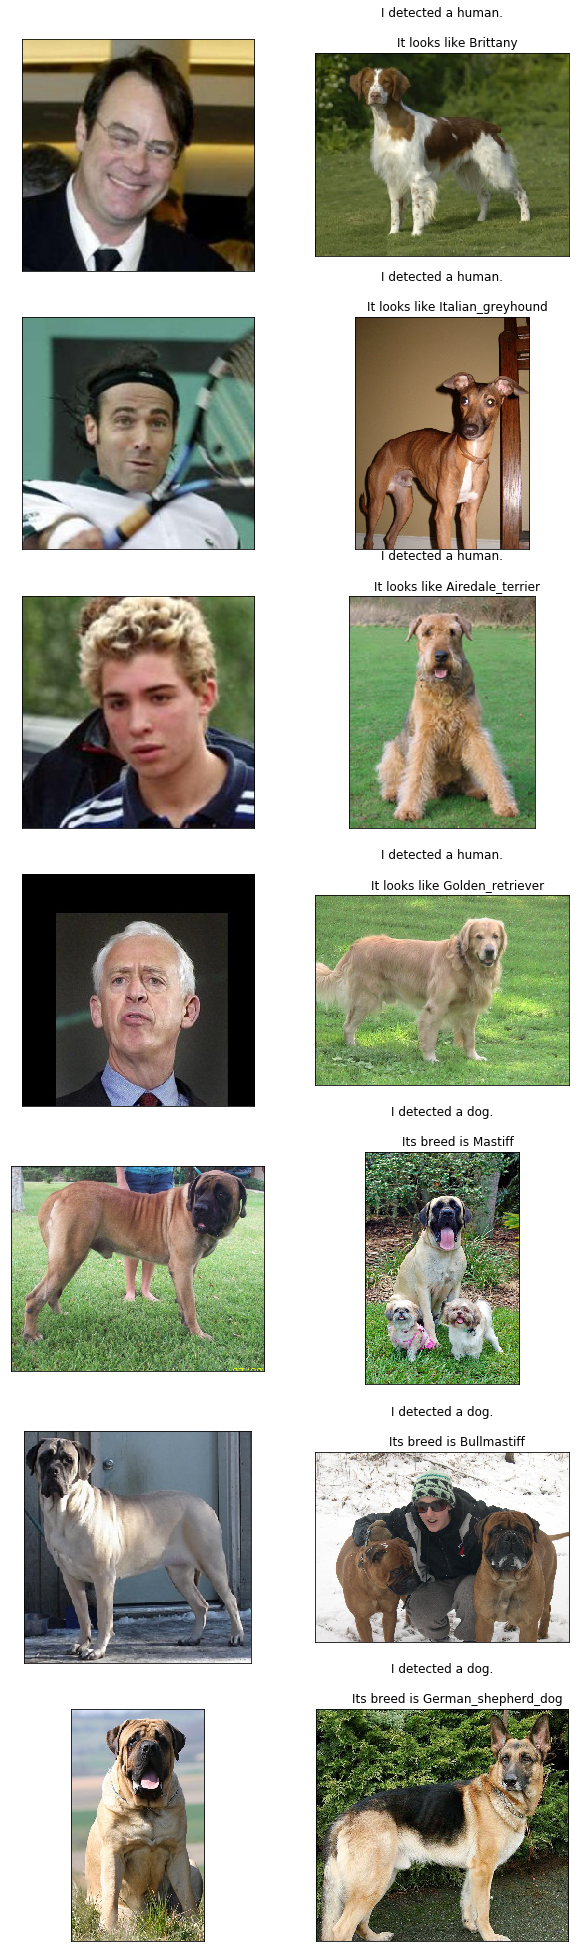

In [60]:
data_paths = np.hstack((human_files[:4], dog_files[:3]))
test_image_set(data_paths)

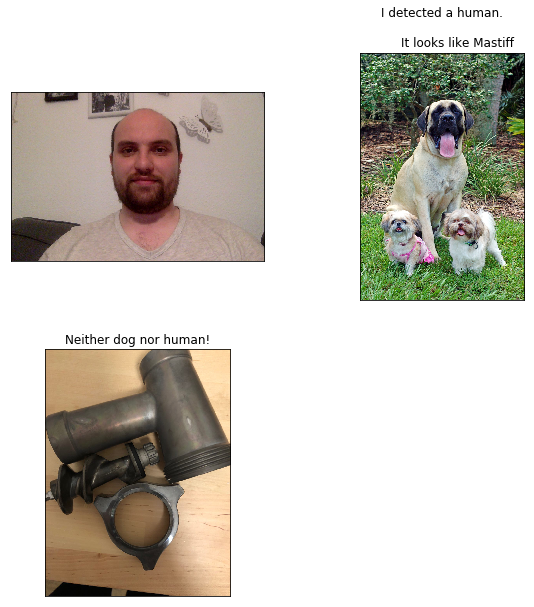

In [73]:
test_image_set(['images/ali_test.jpg', 'images/fleisch_wolf.jpg'])